<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_add_polynomial_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Show the effect of synthetically added features in non-linear classification

Here, we create a hypothetical dataset to show how adding extra features, in this case polynomial, can help with the classification.

In [ ]:
# Generate dataset
import numpy as np

x0 = np.linspace(-3, 3, 20) # shape (20,), 1D array
y = (x0 <= 2) & (x0 >= -2) # shape (20,), 1D array
print([round(xi, 2) for xi in x0])
print(y)

[-3.0, -2.68, -2.37, -2.05, -1.74, -1.42, -1.11, -0.79, -0.47, -0.16, 0.16, 0.47, 0.79, 1.11, 1.42, 1.74, 2.05, 2.37, 2.68, 3.0]
[False False False False  True  True  True  True  True  True  True  True
  True  True  True  True False False False False]


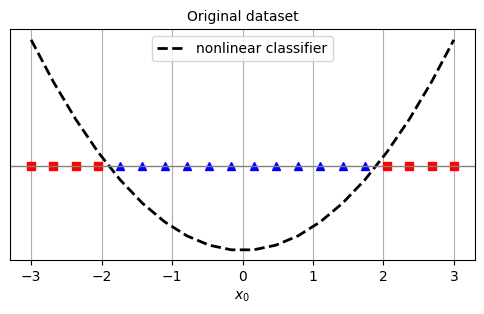

In [ ]:
# Plot dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

plt.plot(x0[y], np.zeros(len((x0[y]))),"b^")
plt.plot(x0[~y], np.zeros(len((x0[~y]))),"rs")
plt.plot(x0, x0**2-3.6, "k--", linewidth=2, label="nonlinear classifier")
plt.axhline(y=0, color='grey', linewidth=1)

plt.legend(loc="upper center")
plt.title("Original dataset", fontsize=10)
plt.xlabel("$x_0$")
plt.gca().yaxis.set_visible(False)
plt.grid()
plt.show()

Obviously a linear classifier (e.g., LinearSVC) cannot be used in this case. An alternative approuch would be to add a non-linear feature.

In [ ]:
# Add polynomial feature (degree=2)
from sklearn.preprocessing import PolynomialFeatures

x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x0.reshape(-1, 1)) # x0.reshape(-1,1) convert x0 of shape (20,) into a 2D array of shape (20,1)
print(x)

[[-3.          9.        ]
 [-2.68421053  7.20498615]
 [-2.36842105  5.60941828]
 [-2.05263158  4.2132964 ]
 [-1.73684211  3.0166205 ]
 [-1.42105263  2.01939058]
 [-1.10526316  1.22160665]
 [-0.78947368  0.6232687 ]
 [-0.47368421  0.22437673]
 [-0.15789474  0.02493075]
 [ 0.15789474  0.02493075]
 [ 0.47368421  0.22437673]
 [ 0.78947368  0.6232687 ]
 [ 1.10526316  1.22160665]
 [ 1.42105263  2.01939058]
 [ 1.73684211  3.0166205 ]
 [ 2.05263158  4.2132964 ]
 [ 2.36842105  5.60941828]
 [ 2.68421053  7.20498615]
 [ 3.          9.        ]]


Our new dataset has a set of nonlinear feature, 2nd-degree in this case. Let's plot the feature and see how it helps with the classification.

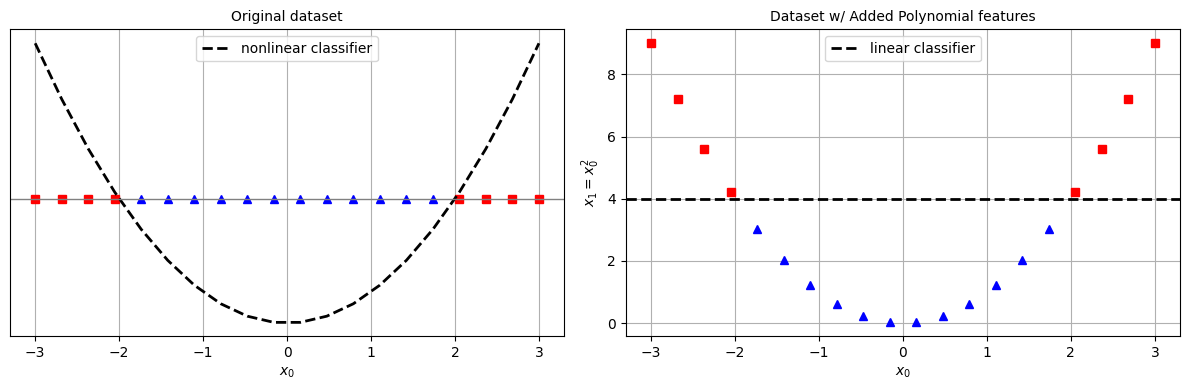

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 row, 2 columns

# Plot on the left subplot
ax1.plot(x0[y], np.zeros(len((x0[y]))),"b^")
ax1.plot(x0[~y], np.zeros(len((x0[~y]))),"rs")
ax1.plot(x0, x0**2-4, "k--", linewidth=2, label="nonlinear classifier")
ax1.axhline(y=0, color='grey', linewidth=1)
ax1.set_title("Original dataset", fontsize=10)
ax1.legend(loc="upper center")
ax1.set_xlabel("$x_0$")
ax1.yaxis.set_visible(False)
ax1.grid()

# Plot on the second subplot
ax2.plot(x[:, 0][y], x[:, 1][y], "b^")
ax2.plot(x[:, 0][~y], x[:, 1][~y], "rs")
ax2.axhline(y=4, color='k',linestyle='--', linewidth=2, label="linear classifier")
ax2.set_title("Dataset w/ Added Polynomial features", fontsize=10)
ax2.legend(loc="upper center")
ax2.set_xlabel("$x_0$")
ax2.set_ylabel("$x_1=x_0^2$")
ax2.grid()

plt.tight_layout()
plt.show()

As shown clearly in the right figure, the new synthetic feature $x_1=x_0^2$ allows us to use linear classifier. So with the added 2nd-degree polynomial feature we can use a linear classifier, such as LinearSVC or SVC with a linear kernel.